In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
from scipy.stats import f_oneway
from scipy.stats import ttest_rel

# Helper Functions

In [2]:
def process_and_average(arr, wave, placement="f"):
    wave = wave.title()
    temp1 = None
    temp2 = None
    if placement.lower() == "f":
        temp1 = arr[wave+"_AF7"]
        temp2 = arr[wave+"_AF8"]
    else:
        temp1 = arr[wave+"_TP9"]
        temp2 = arr[wave+"_TP10"]
    temp1.dropna(axis = 0, inplace=True)
    temp2.dropna(axis = 0, inplace=True)
    avg = ( temp1 + temp2 ) / 2
    return avg.to_numpy()

In [3]:
def passed(data, baseline, debug=False):
    count = 0
    data = ((data - baseline) / baseline ) * 100
    for index in range(len(data)):
        if index == 0:
            continue
        else:
            if data[index-1] <= 100 and data[index] >= 100:
                count += 1
                if debug: print(f"{index}, {data[index-1]}, {data[index]}, {baseline}")
        
    return count

In [4]:
def dropped(data, baseline, debug=False):
    count = 0
    data = ((data - baseline) / baseline ) * 100
    for index in range(len(data)):
        if index == 0:
            continue
        else:
            if data[index-1] >= -100 and data[index] <= -100:
                count += 1
                if debug: print(f"{index}, {data[index-1]}, {data[index]}, {baseline}")
        
    return count

# Loading EEG Data

In [5]:
control = []
for i in range(1,4):
    control.append(pd.read_csv('Control/'+str(i)+'.csv'))
print(control)

[                   TimeStamp  Delta_TP9  Delta_AF7  Delta_AF8  Delta_TP10  \
0    2024-09-20 15:29:35.610        NaN        NaN        NaN         NaN   
1    2024-09-20 15:29:36.613   1.338344  -0.015699   0.243554    1.234289   
2    2024-09-20 15:29:37.613   0.767648  -0.137469   0.145669    0.974176   
3    2024-09-20 15:29:38.617   0.670623  -0.133145   0.211959    0.969150   
4    2024-09-20 15:29:39.596        NaN        NaN        NaN         NaN   
..                       ...        ...        ...        ...         ...   
240  2024-09-20 15:33:01.604   0.044104  -0.292977  -0.310413   -0.051832   
241  2024-09-20 15:33:02.604   0.191318   0.124686   0.128322    0.214605   
242  2024-09-20 15:33:03.605   0.758338   0.503489   0.453126    0.524626   
243  2024-09-20 15:33:04.605   0.534048   0.199007   0.601026    0.798300   
244  2024-09-20 15:33:05.614   0.123609  -0.254580  -0.140539    0.456318   

     Theta_TP9  Theta_AF7  Theta_AF8  Theta_TP10  Alpha_TP9  ...    Gyro_X

In [6]:
easy = []
for i in range(1,4):
    easy.append(pd.read_csv('Easy/'+str(i)+'.csv'))
print(easy)

[                  TimeStamp  Delta_TP9  Delta_AF7  Delta_AF8  Delta_TP10  \
0   2024-09-20 15:38:48.871        NaN        NaN        NaN         NaN   
1   2024-09-20 15:38:48.924        NaN        NaN        NaN         NaN   
2   2024-09-20 15:38:49.872   0.399119  -0.255727   0.646373    0.471183   
3   2024-09-20 15:38:50.872   0.348593  -0.274730  -0.036774    0.279549   
4   2024-09-20 15:38:51.872   0.410673  -0.374059  -0.401192    0.341828   
..                      ...        ...        ...        ...         ...   
61  2024-09-20 15:39:46.874   0.257149   0.118457   0.189873    0.492791   
62  2024-09-20 15:39:47.870   0.087595   0.250219   0.269140    0.360643   
63  2024-09-20 15:39:48.870  -0.051509  -0.321525  -0.339632   -0.258673   
64  2024-09-20 15:39:49.880   0.216326  -0.130951  -0.137059    0.213711   
65  2024-09-20 15:39:50.870   0.393367  -0.049746   0.254333    0.500190   

    Theta_TP9  Theta_AF7  Theta_AF8  Theta_TP10  Alpha_TP9  ...    Gyro_X  \
0        

In [7]:
medium = []
for i in range(1,4):
    medium.append(pd.read_csv('Medium/'+str(i)+'.csv'))
print(medium)

[                   TimeStamp  Delta_TP9  Delta_AF7  Delta_AF8  Delta_TP10  \
0    2024-09-20 15:33:57.887        NaN        NaN        NaN         NaN   
1    2024-09-20 15:33:58.887   0.040558   0.011330   0.230926    0.515624   
2    2024-09-20 15:33:59.377        NaN        NaN        NaN         NaN   
3    2024-09-20 15:33:59.888  -0.255673   0.161477   0.266590    0.362506   
4    2024-09-20 15:34:00.891  -0.113135   0.489301  -0.050137   -0.239626   
..                       ...        ...        ...        ...         ...   
98   2024-09-20 15:35:28.884  -0.033086   0.071559   0.043151   -0.702505   
99   2024-09-20 15:35:29.885  -0.057095  -0.452308  -0.171572   -0.251154   
100  2024-09-20 15:35:30.885   0.095847  -0.503221   0.035521    0.228310   
101  2024-09-20 15:35:31.885   0.576129  -0.302652  -0.022796    0.560503   
102  2024-09-20 15:35:32.885   0.963679  -0.085053   0.098028    1.052465   

     Theta_TP9  Theta_AF7  Theta_AF8  Theta_TP10  Alpha_TP9  ...    Gyro_X

In [8]:
hard = []
for i in range(1,4):
    hard.append(pd.read_csv('Hard/'+str(i)+'.csv'))
print(hard)

[                   TimeStamp  Delta_TP9  Delta_AF7  Delta_AF8  Delta_TP10  \
0    2024-09-20 15:42:24.653        NaN        NaN        NaN         NaN   
1    2024-09-20 15:42:25.052        NaN        NaN        NaN         NaN   
2    2024-09-20 15:42:25.654   0.380378  -0.406960   0.486066    0.494631   
3    2024-09-20 15:42:26.658   0.776368   0.183060   0.592787    0.539242   
4    2024-09-20 15:42:27.263        NaN        NaN        NaN         NaN   
..                       ...        ...        ...        ...         ...   
136  2024-09-20 15:44:27.649  -0.250017  -0.345865  -0.182283   -0.175787   
137  2024-09-20 15:44:28.649   0.351835   0.012129   0.192153    0.196501   
138  2024-09-20 15:44:29.651   0.592356   0.033449   0.414380    0.689427   
139  2024-09-20 15:44:29.676        NaN        NaN        NaN         NaN   
140  2024-09-20 15:44:30.654   0.599848  -0.062024   0.323528    0.854972   

     Theta_TP9  Theta_AF7  Theta_AF8  Theta_TP10  Alpha_TP9  ...    Gyro_X

In [9]:
extreme = []
for i in range(1,4):
    extreme.append(pd.read_csv('Extreme/'+str(i)+'.csv'))
print(extreme)

[                   TimeStamp  Delta_TP9  Delta_AF7  Delta_AF8  Delta_TP10  \
0    2024-09-20 15:36:09.334        NaN        NaN        NaN         NaN   
1    2024-09-20 15:36:10.346  -0.141164  -0.124128   0.147903    0.223566   
2    2024-09-20 15:36:10.442        NaN        NaN        NaN         NaN   
3    2024-09-20 15:36:11.335  -0.128259  -0.003550   0.108307   -0.248061   
4    2024-09-20 15:36:12.335  -0.128259   0.173081   0.307980   -0.248061   
..                       ...        ...        ...        ...         ...   
140  2024-09-20 15:38:18.332        NaN        NaN        NaN         NaN   
141  2024-09-20 15:38:18.332   1.101956   0.464683   0.521194    0.674663   
142  2024-09-20 15:38:19.166        NaN        NaN        NaN         NaN   
143  2024-09-20 15:38:19.331   1.101956   0.595770   1.016870    0.674663   
144  2024-09-20 15:38:20.331   1.101956   0.439035   0.540888    0.674663   

     Theta_TP9  Theta_AF7  Theta_AF8  Theta_TP10  Alpha_TP9  ...    Gyro_X

# Looking at Theta Values

Text(0, 0.5, 'Power [dB]')

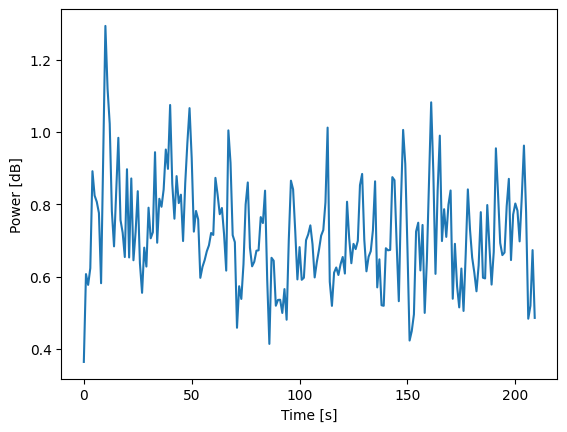

In [14]:
theta_control = []
for i in range(1,4):
    theta_control.append(process_and_average(control[i-1], "theta"))

plt.plot(theta_control[1])
plt.xlabel("Time [s]")
plt.ylabel("Power [dB]")

Text(0, 0.5, 'Power [dB]')

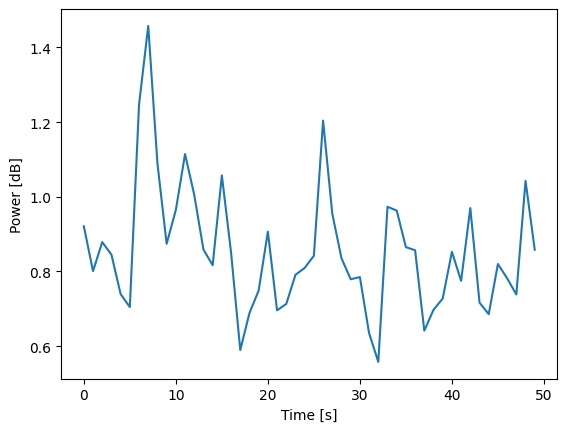

In [15]:
theta_easy = []
for i in range(1,4):
    theta_easy.append(process_and_average(easy[i-1], "theta"))

plt.plot(theta_easy[2])
plt.xlabel("Time [s]")
plt.ylabel("Power [dB]")

Text(0, 0.5, 'Power [dB]')

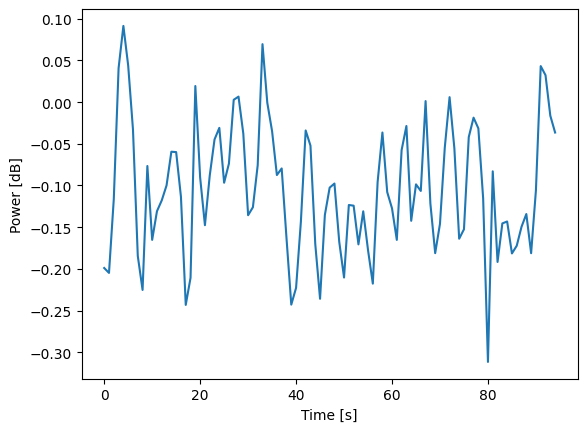

In [16]:
theta_medium = []
for i in range(1,4):
    theta_medium.append(process_and_average(medium[i-1], "theta"))

plt.plot(theta_medium[0])
plt.xlabel("Time [s]")
plt.ylabel("Power [dB]")

Text(0, 0.5, 'Power [dB]')

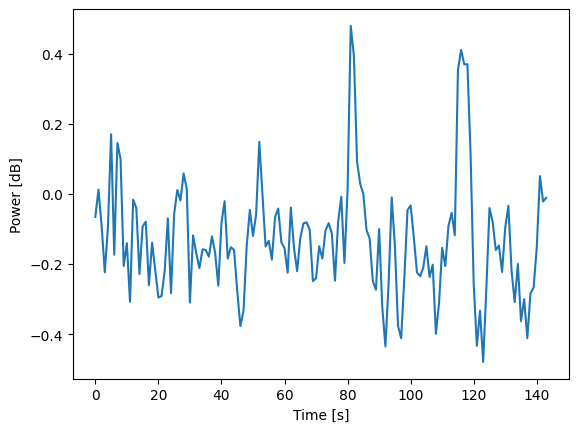

In [13]:
theta_hard = []
for i in range(1,4):
    theta_hard.append(process_and_average(hard[i-1], "theta"))

plt.plot(theta_hard[1])
plt.xlabel("Time [s]")
plt.ylabel("Power [dB]")

Text(0, 0.5, 'Power [dB]')

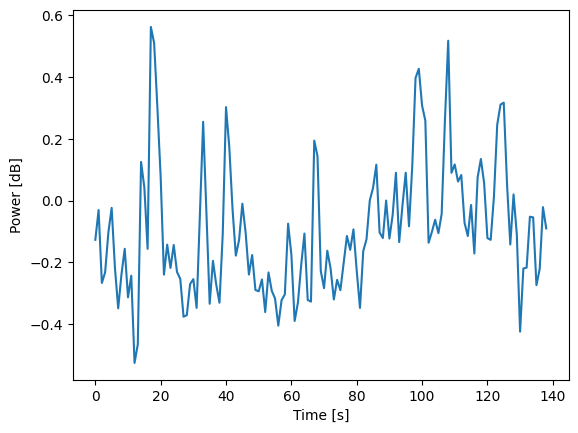

In [14]:
theta_extreme = []
for i in range(1,4):
    theta_extreme.append(process_and_average(extreme[i-1], "theta"))

plt.plot(theta_extreme[1])
plt.xlabel("Time [s]")
plt.ylabel("Power [dB]")

## ANOVA

In [15]:
theta_avg_control = []
theta_avg_easy = []
theta_avg_medium = []
theta_avg_hard = []
theta_avg_extreme = []
for i in range(1,4):
    theta_avg_control.append(np.average(theta_control[i-1]))
    theta_avg_easy.append(np.average(theta_easy[i-1]))
    theta_avg_medium.append(np.average(theta_medium[i-1]))
    theta_avg_hard.append(np.average(theta_hard[i-1]))
    theta_avg_extreme.append(np.average(theta_extreme[i-1]))

print(theta_avg_extreme)
print(theta_avg_hard)
print(theta_avg_medium)
print(theta_avg_easy)
print(theta_avg_control)

[np.float64(-0.2097722965319764), np.float64(-0.09571670452150478), np.float64(-0.19733563936044393)]
[np.float64(-0.04311113345495933), np.float64(-0.12882477561153238), np.float64(-0.14487005304397474)]
[np.float64(-0.22205528825728157), np.float64(-0.3069764835975062), np.float64(-0.061709057010819905)]
[np.float64(-0.2054120011416372), np.float64(-0.15829046358558932), np.float64(-0.1289086820025757)]
[np.float64(-0.06470209410317364), np.float64(0.057655543361373594), np.float64(0.05888370453059933)]


In [16]:
# Anova Test
f_oneway(theta_avg_extreme, theta_avg_hard, theta_avg_medium, theta_avg_easy, theta_avg_control)

F_onewayResult(statistic=np.float64(3.7732102555770646), pvalue=np.float64(0.04028222925609885))

p < 0.05, therefore there is a statistical difference :D

## t-test Analysis

In [27]:
ttest_rel(theta_avg_hard, theta_avg_easy, alternative="greater")

TtestResult(statistic=np.float64(1.0957239056885917), pvalue=np.float64(0.19376508639648854), df=np.int64(2))

## Thresholding Analysis

2, -979.1455054133356, 670.2063086971892, 0.017279051262933096
8, -1392.338047862483, 555.810248385164, 0.017279051262933096
11, -818.0829365012976, 842.4303670962992, 0.017279051262933096
63, -954.2751696024096, 156.0098744988843, 0.017279051262933096
77, -2430.8543401658903, 1017.89162963242, 0.017279051262933096
95, 94.63234537258928, 243.67551356800197, 0.017279051262933096
98, -1184.443727300684, 364.26269733441995, 0.017279051262933096
107, -889.5902694861251, 1703.4371476570489, 0.017279051262933096
111, -547.2566490210854, 586.5690668752612, 0.017279051262933096
120, -1881.5192123521322, 496.10909886838107, 0.017279051262933096
124, -2370.4760591557315, 1541.6873167241213, 0.017279051262933096
11


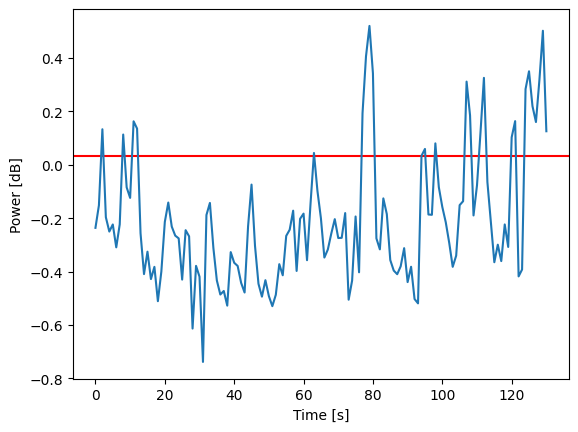

In [28]:
theta_baseline = np.average(theta_avg_control)

plt.axhline(y = theta_baseline*2, color = 'r', linestyle = '-')
plt.plot(theta_extreme[0])
plt.xlabel("Time [s]")
plt.ylabel("Power [dB]")

print(passed(theta_extreme[0], theta_baseline, True))

In [29]:
theta_baseline = np.average(theta_avg_control)
theta_easy_crossed = []
theta_medium_crossed = []
theta_hard_crossed = []
theta_extreme_crossed = []

for i in range(1, 4):
    theta_easy_crossed.append(passed(theta_easy[i-1], theta_baseline))
    theta_medium_crossed.append(passed(theta_medium[i-1], theta_baseline))
    theta_hard_crossed.append(passed(theta_hard[i-1], theta_baseline))
    theta_extreme_crossed.append(passed(theta_extreme[i-1], theta_baseline))

print(theta_easy_crossed)
print(theta_medium_crossed)
print(theta_hard_crossed)
print(theta_extreme_crossed)

[4, 1, 4]
[3, 2, 7]
[14, 7, 7]
[11, 12, 6]


In [30]:
# Anova Test
f_oneway(theta_easy_crossed, theta_medium_crossed, theta_hard_crossed, theta_extreme_crossed)

F_onewayResult(statistic=np.float64(3.987878787878787), pvalue=np.float64(0.05225009369806226))

In [37]:
ttest_rel(theta_hard_crossed, theta_easy_crossed)

TtestResult(statistic=np.float64(3.1235807588017885), pvalue=np.float64(0.0890197271777701), df=np.int64(2))

# Looking at Alpha Levels


In [118]:
alpha_control = []
alpha_easy = []
alpha_medium = []
alpha_hard = []
alpha_extreme = []

for i in range(1,4):
    alpha_control.append(process_and_average(control[i-1], "alpha", "b"))
    alpha_easy.append(process_and_average(easy[i-1], "alpha", "b"))
    alpha_medium.append(process_and_average(medium[i-1], "alpha", "b"))
    alpha_hard.append(process_and_average(hard[i-1], "alpha", "b"))
    alpha_extreme.append(process_and_average(extreme[i-1], "alpha", "b"))


Text(0, 0.5, 'Power [dB]')

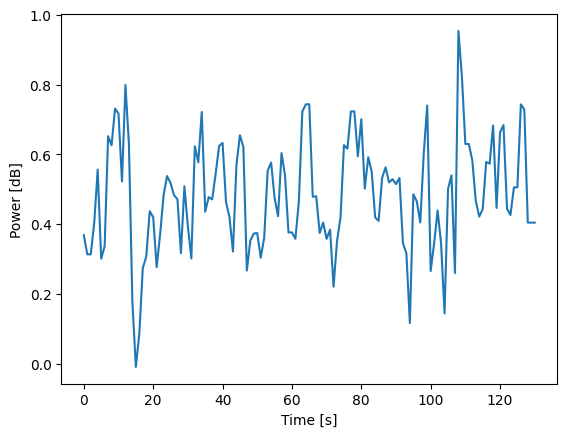

In [137]:
plt.plot(alpha_extreme[0])
plt.xlabel("Time [s]")
plt.ylabel("Power [dB]")

In [120]:
alpha_avg_control = []
alpha_avg_easy = []
alpha_avg_medium = []
alpha_avg_hard = []
alpha_avg_extreme = []
for i in range(1,4):
    alpha_avg_control.append(np.average(alpha_control[i-1]))
    alpha_avg_easy.append(np.average(alpha_easy[i-1]))
    alpha_avg_medium.append(np.average(alpha_medium[i-1]))
    alpha_avg_hard.append(np.average(alpha_hard[i-1]))
    alpha_avg_extreme.append(np.average(alpha_extreme[i-1]))

print(alpha_avg_extreme)
print(alpha_avg_hard)
print(alpha_avg_medium)
print(alpha_avg_easy)
print(alpha_avg_control)

# Anova Test
f_oneway(alpha_avg_extreme, alpha_avg_hard, alpha_avg_medium, alpha_avg_easy, alpha_avg_control)

[np.float64(0.48389333183779076), np.float64(0.45751861412961053), np.float64(0.39844766825509326)]
[np.float64(0.5406047973233326), np.float64(0.4560357366168877), np.float64(0.5066541897421005)]
[np.float64(0.5198438402084771), np.float64(0.4685030396039072), np.float64(0.4821188242537026)]
[np.float64(0.5340992465344626), np.float64(0.501190718740237), np.float64(0.5432852141753347)]
[np.float64(0.4729963137524242), np.float64(0.3633651822275809), np.float64(0.46958144688701453)]


F_onewayResult(statistic=np.float64(2.4662772117868728), pvalue=np.float64(0.11259049686240084))

49, -74.53989664406365, -138.0135617461387, 0.4353143142890065
83, 10.34805065301128, -114.9335287387706, 0.4353143142890065
2


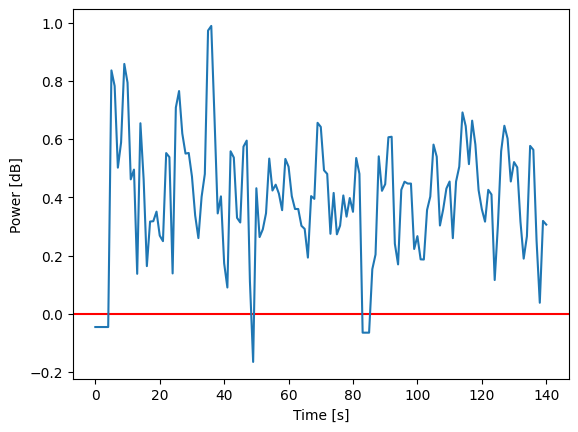

In [152]:
alpha_baseline = np.average(alpha_avg_control)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.plot(alpha_extreme[2])
plt.xlabel("Time [s]")
plt.ylabel("Power [dB]")

print(dropped(alpha_extreme[2], alpha_baseline, True))

In [147]:
alpha_baseline = np.average(alpha_avg_control)
alpha_easy_crossed = []
alpha_medium_crossed = []
alpha_hard_crossed = []
alpha_extreme_crossed = []

for i in range(1, 4):
    alpha_easy_crossed.append(dropped(alpha_easy[i-1], alpha_baseline))
    alpha_medium_crossed.append(dropped(alpha_medium[i-1], alpha_baseline))
    alpha_hard_crossed.append(dropped(alpha_hard[i-1], alpha_baseline))
    alpha_extreme_crossed.append(dropped(alpha_extreme[i-1], alpha_baseline))

print(alpha_easy_crossed)
print(alpha_medium_crossed)
print(alpha_hard_crossed)
print(alpha_extreme_crossed)

[0, 0, 0]
[0, 0, 0]
[0, 1, 0]
[1, 3, 2]


In [148]:
# Anova Test
f_oneway(alpha_easy_crossed, alpha_medium_crossed, alpha_hard_crossed, alpha_extreme_crossed)

F_onewayResult(statistic=np.float64(8.250000000000002), pvalue=np.float64(0.00785723307231884))